In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())
import warnings
warnings.filterwarnings('ignore')

['.idea', '.venv', 'decision_tree_model.pkl', 'heart-disease-model-v2.pkl', 'heart-disease-model.ipynb', 'heart-disease-predictor.pkl', 'heart.csv', 'heart_notebook_predictor.ipynb', 'heart_two.csv', 'knn_model.pkl', 'logistic_model.pkl', 'naive_bayes_model.pkl', 'neural_net_model.pkl', 'random_forest_model.pkl', 'svm_model.pkl', 'xgboost_model.pkl']


In [167]:
dataset = pd.read_csv("heart_two.csv")

In [168]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [169]:
dataset['target'] = dataset['target'].apply(lambda x: 1 if x == True else 0)

In [170]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [171]:
dataset.shape

(1025, 14)

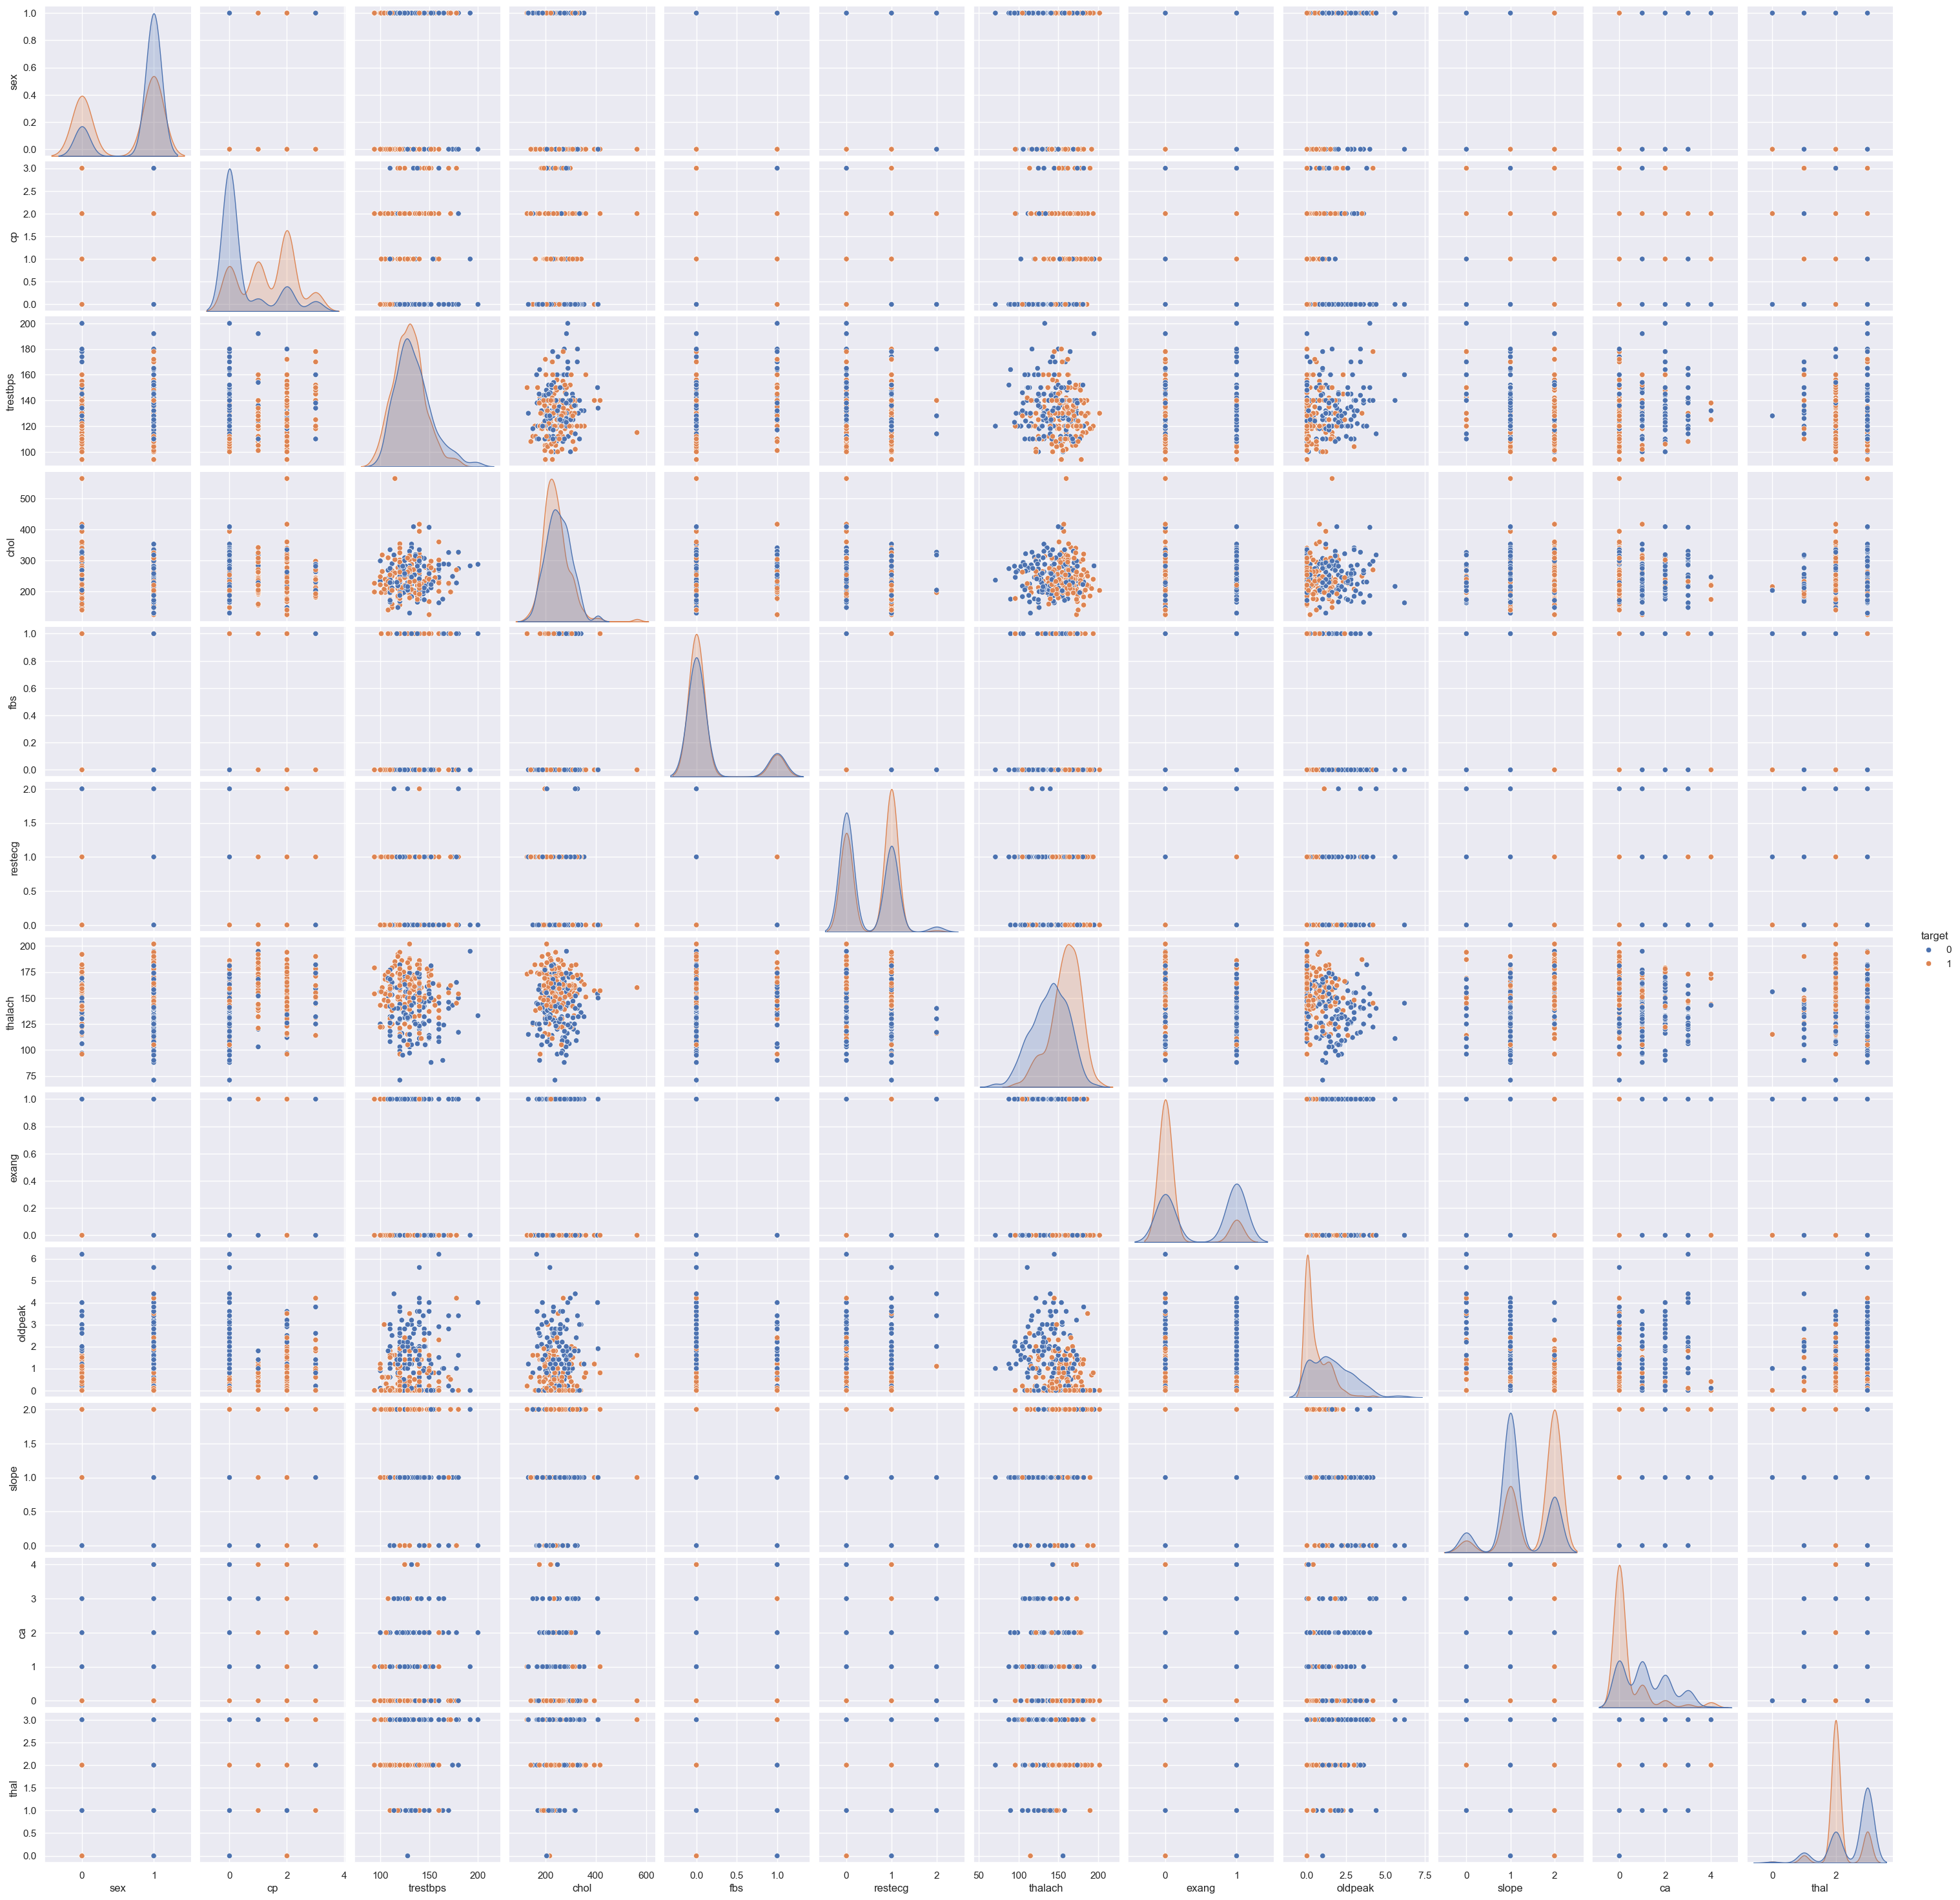

In [172]:
sns.pairplot(dataset, hue='target', vars= dataset.columns[1:-1])

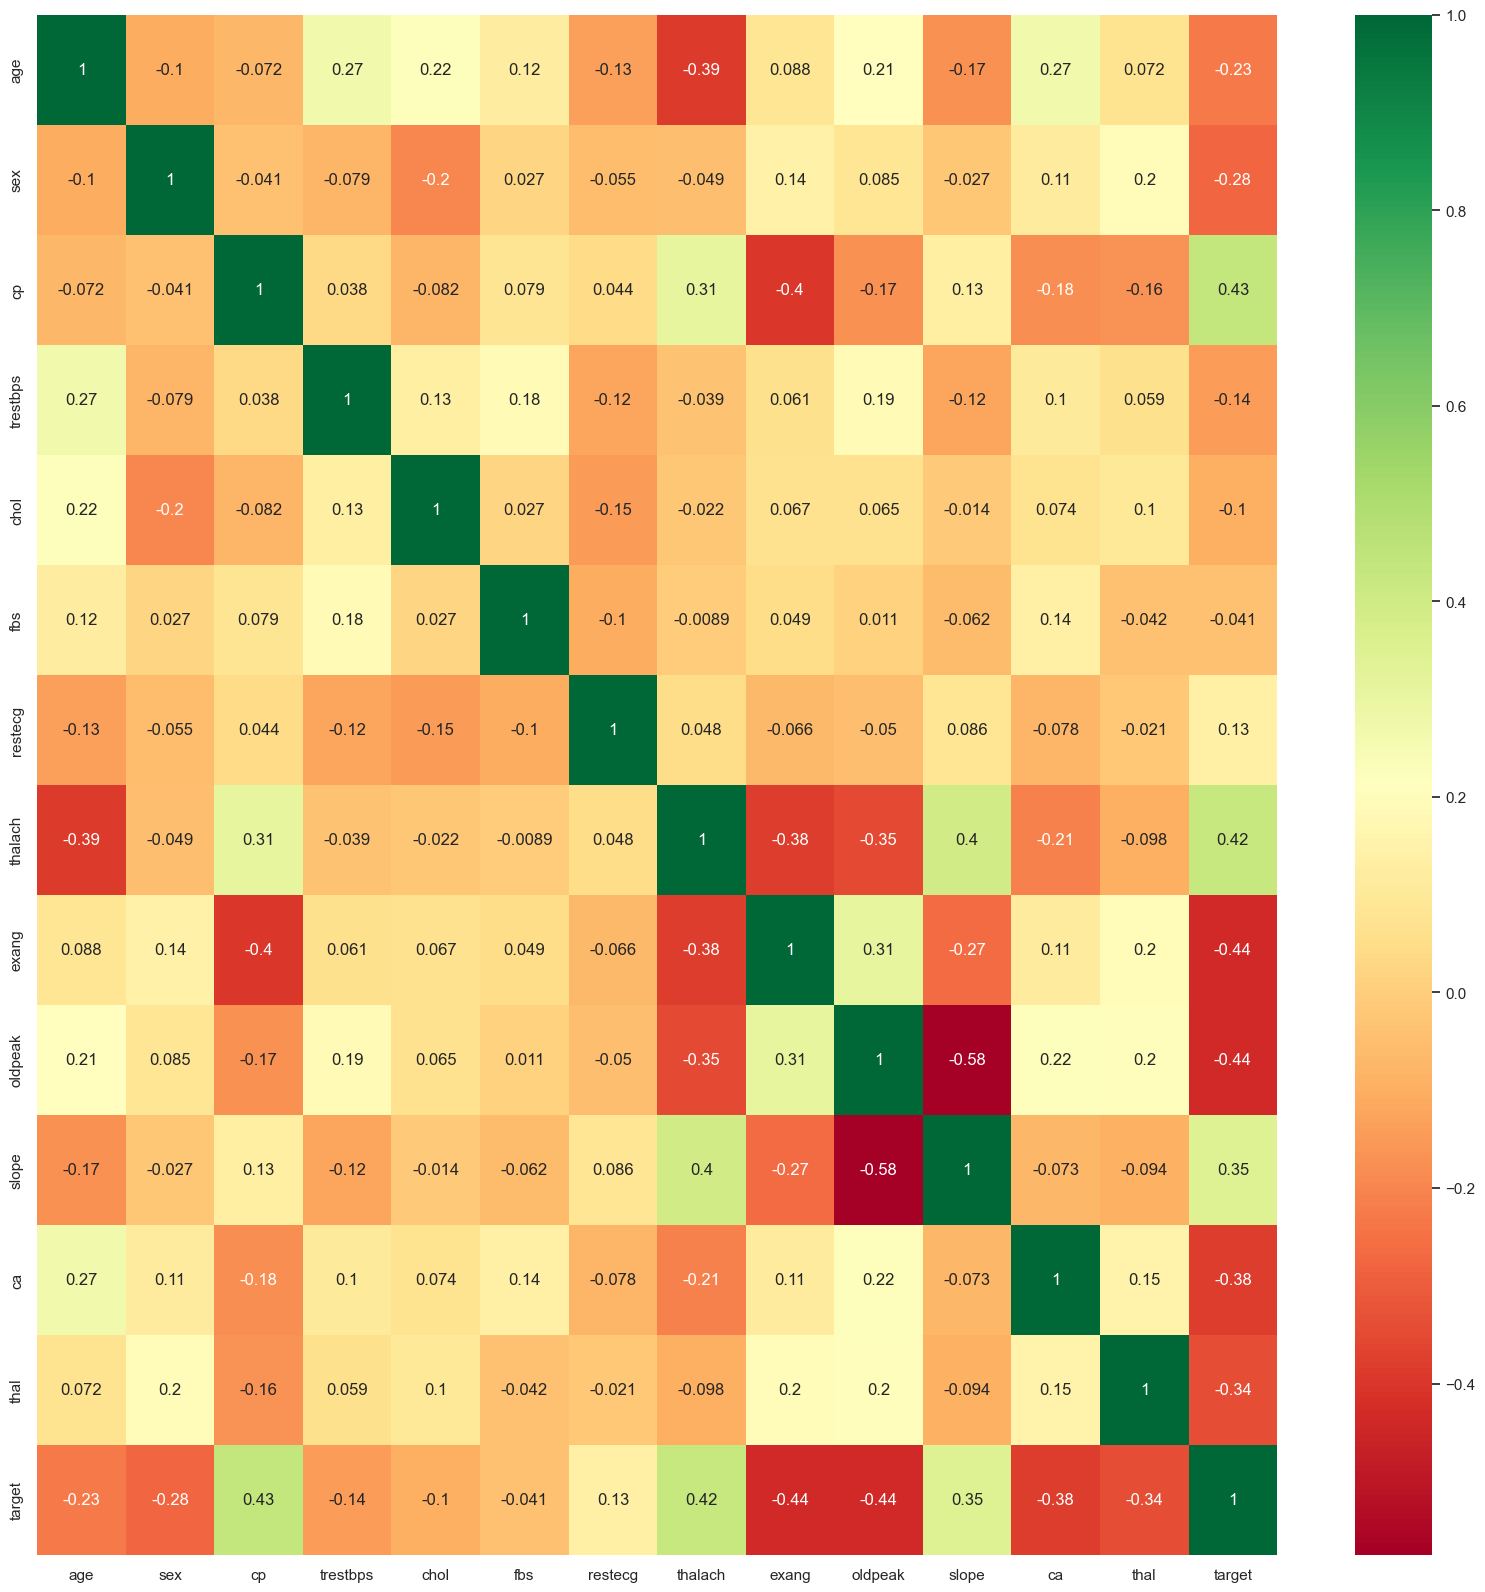

In [175]:
corrmat = dataset.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(20,20))
#plot the heat map
g = sns.heatmap(dataset[top_corr_features].corr(), annot=True, cmap="RdYlGn")

<Axes: ylabel='count'>

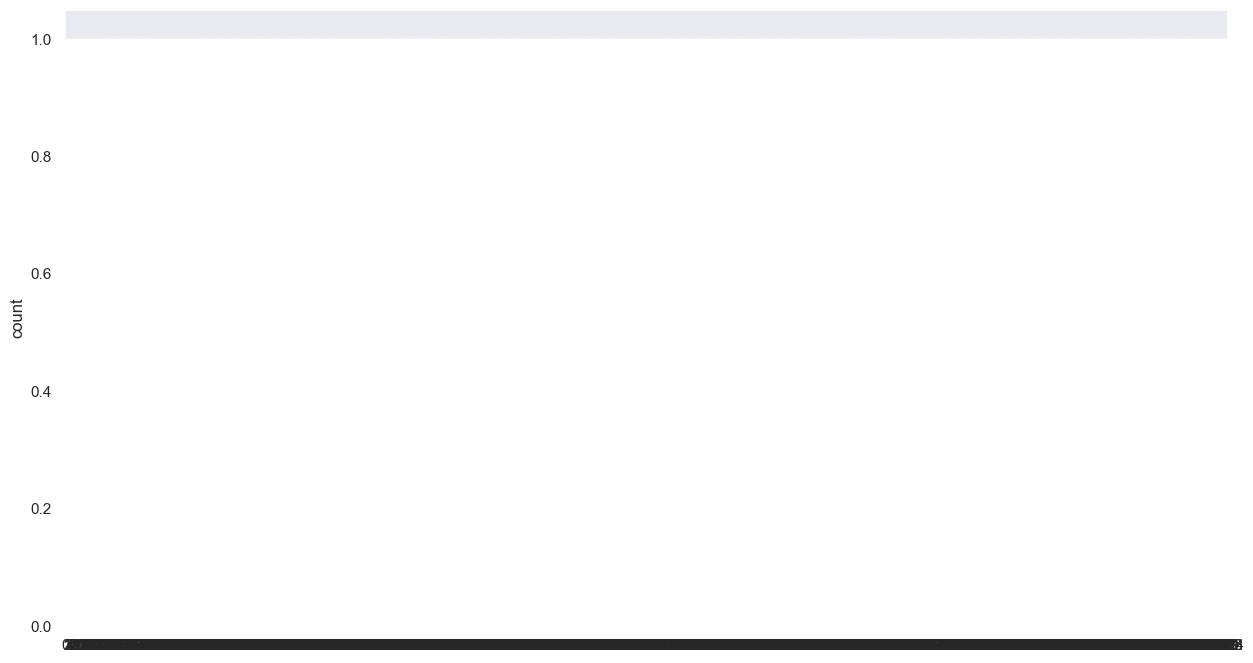

In [176]:
sns.countplot(dataset['target'])

In [177]:
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [178]:
na_columns = ['cp', 'exang', 'thalach', 'oldpeak', 'ca']
dataset[na_columns] = dataset[na_columns].replace(0, np.nan)

In [180]:
df = dataset.copy()

for column in ['cp', 'exang', 'thalach', 'oldpeak', 'ca']:
    median_0 = dataset[column][dataset['target']==0].median()
    median_1 = dataset[column][dataset['target']==1].median()

df.loc[df['target'] == 0, column] = dataset.loc[df['target'] == 0, column].fillna(median_0)
df.loc[df['target'] == 1, column] = dataset.loc[df['target'] == 1, column].fillna(median_1)

In [181]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,NaN,125,212,0,1,168,NaN,1.0,2,2.0,3,0
1,53,1,NaN,140,203,1,0,155,1.0,3.1,0,2.0,3,0
2,70,1,NaN,145,174,0,1,125,1.0,2.6,0,2.0,3,0
3,61,1,NaN,148,203,0,1,161,NaN,NaN,2,1.0,3,0
4,62,0,NaN,138,294,1,1,106,NaN,1.9,1,3.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1.0,140,221,0,1,164,1.0,NaN,2,1.0,2,1
1021,60,1,NaN,125,258,0,0,141,1.0,2.8,1,1.0,3,0
1022,47,1,NaN,110,275,0,0,118,1.0,1.0,1,1.0,2,0
1023,50,0,NaN,110,254,0,0,159,NaN,NaN,2,1.0,2,1


In [182]:
df["ca"] = df["ca"].fillna(df["ca"].median())
df["oldpeak"] = df["oldpeak"].fillna(df["oldpeak"].median())

In [183]:
X = df.drop('target', axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,NaN,125,212,0,1,168,NaN,1.0,2,2.0,3
1,53,1,NaN,140,203,1,0,155,1.0,3.1,0,2.0,3
2,70,1,NaN,145,174,0,1,125,1.0,2.6,0,2.0,3
3,61,1,NaN,148,203,0,1,161,NaN,1.4,2,1.0,3
4,62,0,NaN,138,294,1,1,106,NaN,1.9,1,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1.0,140,221,0,1,164,1.0,1.4,2,1.0,2
1021,60,1,NaN,125,258,0,0,141,1.0,2.8,1,1.0,3
1022,47,1,NaN,110,275,0,0,118,1.0,1.0,1,1.0,2
1023,50,0,NaN,110,254,0,0,159,NaN,1.4,2,1.0,2


In [184]:
y = df.target
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

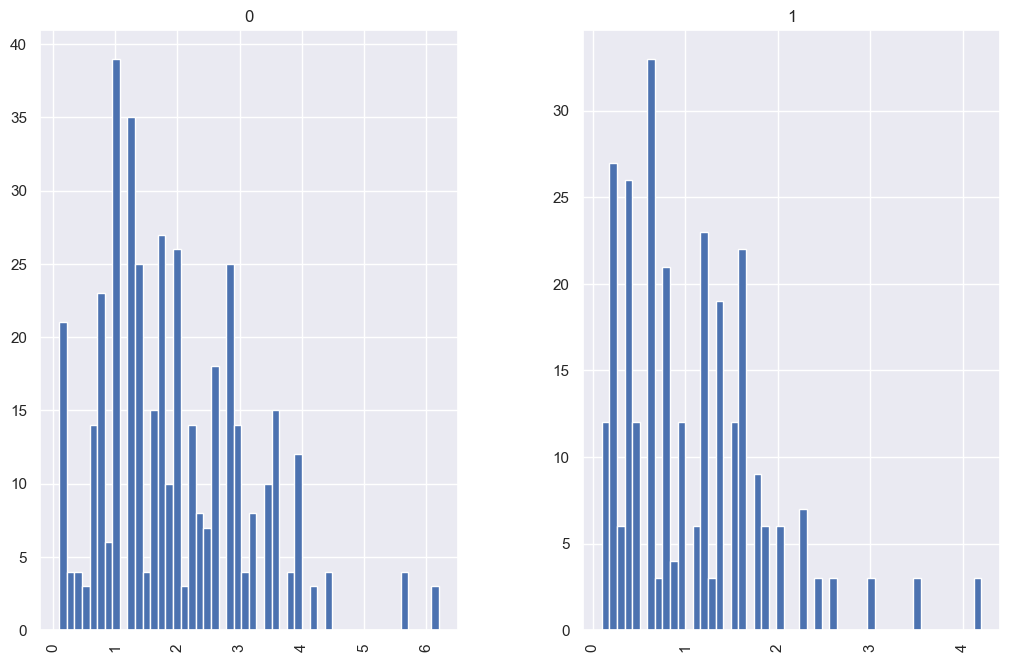

In [185]:
dataset.hist(column='oldpeak', bins=50, by='target', figsize=(12,8))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

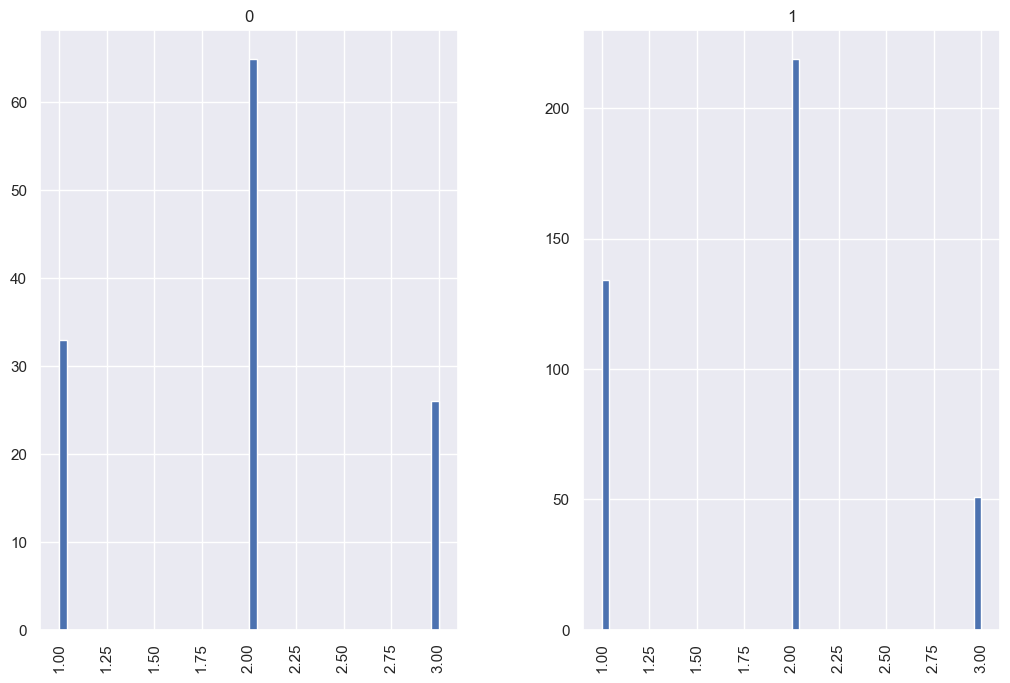

In [187]:
dataset.hist(column='cp',bins=50,by='target',figsize=(12,8))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

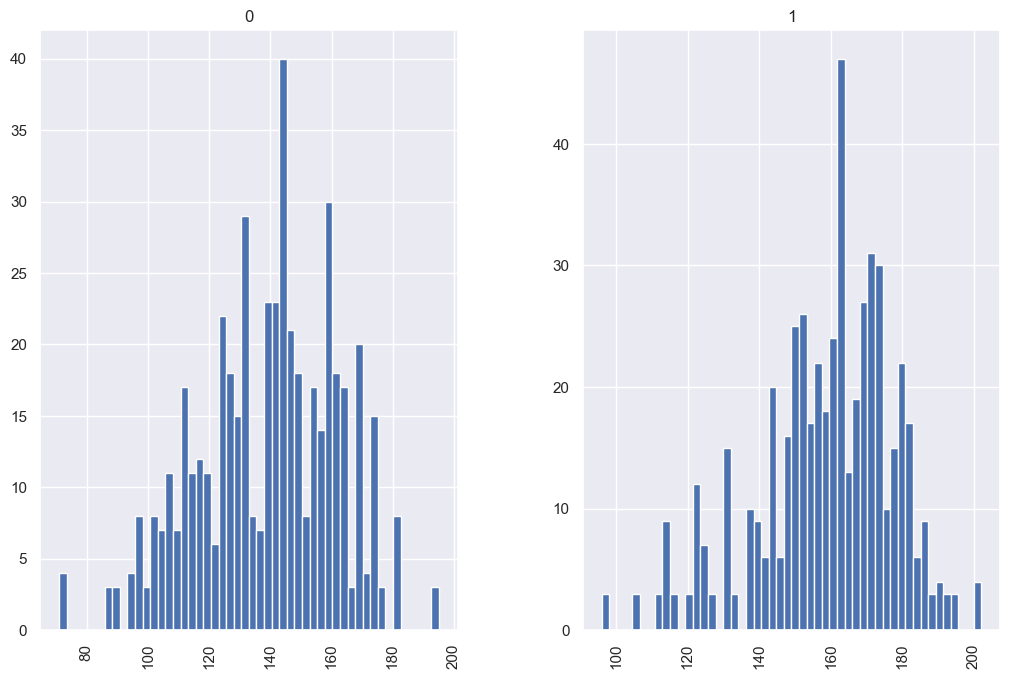

In [188]:
dataset.hist(column='thalach', bins=50, by='target', figsize=(12,8))

In [189]:
#creating metrics for evaluations

from sklearn import metrics

f1 =  metrics.make_scorer(metrics.f1_score)
accuracy = metrics.make_scorer(metrics.accuracy_score)
precision= metrics.make_scorer(metrics.precision_score)
recall = metrics.make_scorer(metrics.recall_score)
auc =  metrics.make_scorer(metrics.roc_auc_score)

In [190]:
scoring = {
    "accuracy":accuracy,
    "precision":precision,
    "recall": recall,
    "f1":f1,
}

In [191]:
def printResults(cv):
    print("Accuracy  {:.3f} ({:.3f})".format(cv["test_accuracy"].mean(), cv["test_accuracy"].std()))
    print("Precision {:.3f} ({:.3f})".format(cv["test_precision"].mean(), cv["test_precision"].std()))
    print("Recall    {:.3f} ({:.3f})".format(cv["test_recall"].mean(), cv["test_recall"].std()))
    print("F1        {:.3f} ({:.3f})".format(cv["test_f1"].mean(), cv["test_f1"].std()))

In [192]:
#creating our model
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
from  sklearn.ensemble import  GradientBoostingClassifier
gbc = GradientBoostingClassifier()


In [194]:
from  sklearn.impute import SimpleImputer

#creating an imputer

imputer = SimpleImputer(strategy= 'mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

#convert back to the dataframe
import pandas as pd

# Assuming X_train and X_test are already defined as numpy arrays or similar
X_train = pd.DataFrame(X_train, columns=[
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal"
])

X_test = pd.DataFrame(X_test, columns=[
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal"
])

In [197]:
print(X_train.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [199]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [201]:
y_pred = gbc.predict(X_test)

In [203]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       102
           1       0.96      0.99      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



<Axes: >

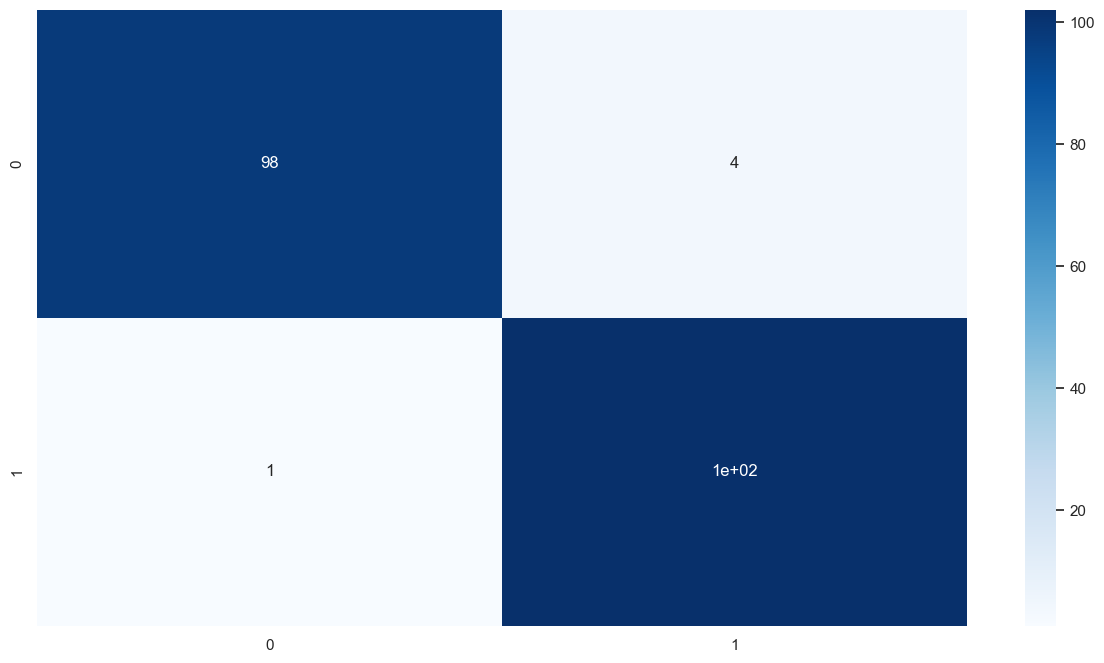

In [205]:
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues")

In [208]:
from sklearn.model_selection import cross_validate

cv_gbc = cross_validate(gbc,X_train, y_train, scoring=scoring, cv=5)

In [209]:
printResults(cv_gbc)

Accuracy  0.973 (0.016)
Precision 0.972 (0.023)
Recall    0.976 (0.021)
F1        0.974 (0.016)


In [210]:
from sklearn.model_selection import GridSearchCV

#tuning the model
params = {
    'loss': ['deviance','exponential'],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'n_estimators': [100,200,300,400,500,600,700,800,800,1000],
}
gs = GridSearchCV(estimator = gbc,param_grid=params,cv=5)


In [211]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

# Define the parameter grid for tuning hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Step size to shrink the weight of each tree
    'max_depth': [3, 5, 7],  # Maximum depth of the individual trees
}

# Create the GradientBoostingClassifier model
model = GradientBoostingClassifier()

# Use GridSearchCV with 5-fold cross-validation
gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Now fit the model using GridSearchCV
gs.fit(X_imputed, y)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [212]:
gs.best_score_

0.9970731707317073

In [213]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [214]:
gbc_best = GradientBoostingClassifier(learning_rate=0.01,max_depth=5,n_estimators=100)

In [217]:
print("NaNs in training data:\n", X_train.isnull().sum())
print("NaNs in test data:\n", X_test.isnull().sum())

NaNs in training data:
 age           0
sex           0
cp          397
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang       540
oldpeak     265
slope         0
ca          454
thal          0
dtype: int64
NaNs in test data:
 age           0
sex           0
cp          100
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang       140
oldpeak      64
slope         0
ca          124
thal          0
dtype: int64


In [218]:
# Fill with mean
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [219]:
gbc_best.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5)

In [221]:
y_pred = gbc_best.predict(X_test)

In [222]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        98
           1       0.93      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



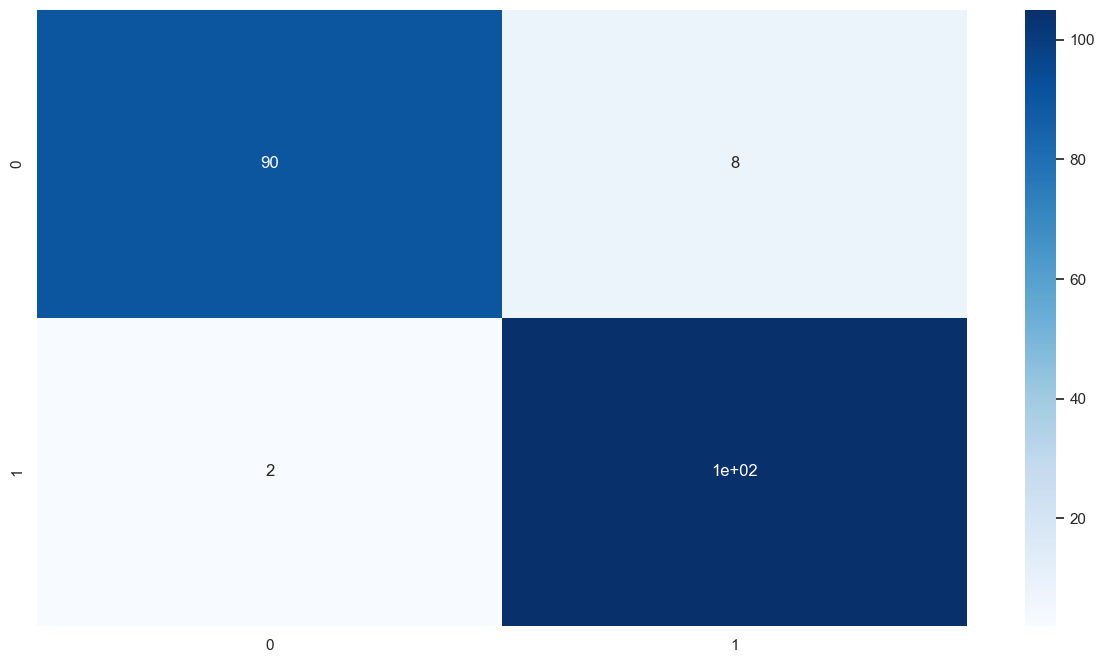

In [223]:
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues");

In [224]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier

# Create the imputer (using mean strategy)
imputer = SimpleImputer(strategy='mean')

# Impute the missing values in X
X_imputed = imputer.fit_transform(X)

# Now perform cross-validation
cv_gbc_best = cross_validate(gbc_best, X_imputed, y, cv=5, scoring=scoring)

# Print results
print(cv_gbc_best)


{'fit_time': array([0.7327702 , 0.36393428, 0.24523807, 0.19248581, 0.23993444]), 'score_time': array([0.        , 0.00666928, 0.0065167 , 0.00414038, 0.01679993]), 'test_accuracy': array([0.95121951, 0.94146341, 0.93170732, 0.92682927, 0.91219512]), 'test_precision': array([0.91304348, 0.9266055 , 0.89565217, 0.89473684, 0.89285714]), 'test_recall': array([1.        , 0.96190476, 0.98095238, 0.97142857, 0.94339623]), 'test_f1': array([0.95454545, 0.94392523, 0.93636364, 0.93150685, 0.91743119])}


In [225]:
printResults(cv_gbc_best)

Accuracy  0.933 (0.013)
Precision 0.905 (0.013)
Recall    0.972 (0.019)
F1        0.937 (0.012)


In [226]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X
X_imputed = imputer.fit_transform(X)

# Now run cross-validation with the imputed data
accuracies = cross_val_score(gbc_best, X_imputed, y, cv=10)

# Print accuracies
print(accuracies)


[0.95145631 0.94174757 0.97087379 0.9223301  0.94174757 0.95098039
 0.93137255 0.96078431 0.92156863 0.89215686]


In [215]:
from sklearn.model_selection import train_test_split
predictors = dataset.drop("target", axis=1)
target = dataset["target"]

X_train,X_test,y_train,y_test = train_test_split(predictors,target,test_size=0.2, random_state=0)

In [120]:
X_train.shape

(820, 13)

In [121]:
X_test.shape

(205, 13)

In [122]:
y_train.shape

(820,)

In [123]:
y_test.shape

(205,)

In [124]:
#model fitting

In [125]:
#logistic regression
from sklearn.metrics import accuracy_score

In [126]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [127]:
y_pred_lr = lr.predict(X_test)
y_pred_lr.shape

(205,)

In [128]:
score_lr = round(accuracy_score(y_pred_lr, y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


In [129]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [130]:
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

In [131]:
y_pred_nb.shape

(205,)

In [132]:
score_nb = round(accuracy_score(y_pred_nb, y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+ " %")

The accuracy score achieved using Naive Bayes is: 85.37 %


In [133]:
#svm
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, y_train)

y_pred_svm = sv.predict(X_test)

In [134]:
y_pred_svm.shape

(205,)

In [135]:
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.9 %


In [136]:
#k nearest neighbors

In [137]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

In [138]:
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [139]:
y_pred_knn.shape

(205,)

In [140]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


In [141]:
#decision  tree
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

In [142]:
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
Y_pred_dt = dt.predict(X_test)

In [143]:
print(y_pred_dt.shape)

(205,)


In [144]:
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


In [145]:
#random forest

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

max_accuracy = 0

for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

In [146]:
Y_pred_rf.shape

(205,)

In [147]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


In [148]:
#xgboost

import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

xgb_model.fit(X_train,y_train)

y_pred_xgb = xgb_model.predict(X_test)


In [149]:
y_pred_xgb.shape

(205,)

In [150]:
score_xgb = round(accuracy_score(y_pred_xgb,y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 100.0 %


In [151]:
#neural network

from keras.api.models import Sequential
from keras.api.layers import Dense

In [152]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [153]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4903 - loss: 8.4414    
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6309 - loss: 1.4754 
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6265 - loss: 1.1170 
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.6333 - loss: 1.1002
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6655 - loss: 0.9771 
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6684 - loss: 0.9753 
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6886 - loss: 0.9165 
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6958 - loss: 0.8606 
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6653 - loss: 0.9103
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6989 - loss: 0.8359 


In [154]:
y_pred_nn = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [155]:
y_pred_nn.shape

(205, 1)

In [156]:
rounded = [round(x[0]) for x in y_pred_nn]

y_pred_nn.shape

(205, 1)

In [157]:
# Convert probability predictions to binary class predictions (0 or 1)
y_pred_nn_classes = (y_pred_nn > 0.5).astype(int)

# Now calculate accuracy
score_nn = round(accuracy_score(y_pred_nn_classes, y_test)*100, 2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

# Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11.

The accuracy score achieved using Neural Network is: 78.05 %


In [158]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %
The accuracy score achieved using Naive Bayes is: 85.37 %
The accuracy score achieved using Support Vector Machine is: 83.9 %
The accuracy score achieved using K-Nearest Neighbors is: 72.2 %
The accuracy score achieved using Decision Tree is: 100.0 %
The accuracy score achieved using Random Forest is: 100.0 %
The accuracy score achieved using XGBoost is: 100.0 %
The accuracy score achieved using Neural Network is: 78.05 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

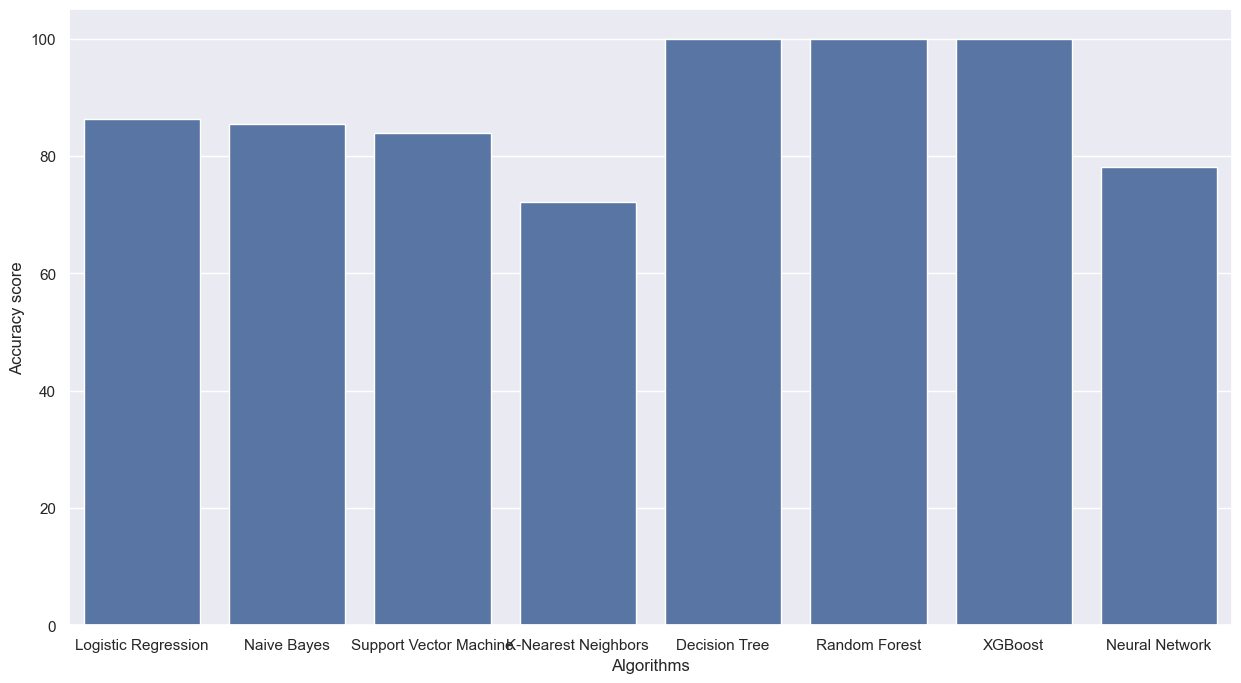

In [159]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

In [254]:
import pickle

filename = 'heart-model.pkl'
pickle.dump(dt,open(filename,'wb'))

In [255]:
import pickle
import pandas as pd

# Load the saved model
with open('heart-model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [263]:
import numpy as np

patient = np.array([[40, 0, 0, 120, 190, 0, 0, 170, 0, 0.0, 1, 0, 2]])

In [264]:
prediction = loaded_model.predict(patient)


# Output the result
if prediction[0] == 1:
    print("You are at risk of a heart disease!🤒  "
          "Please consult a doctor to check on you!")
else:
    print("You are not at risk of a heart disease! Continue Good Health Practices😀")

You are at risk of a heart disease!🤒  Please consult a doctor to check on you!
